C:\Users\SSacco\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


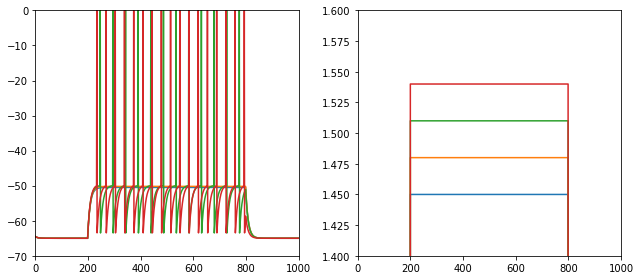

In [18]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

tau = 10;    # membrane time constant (ms)
R   = 10;    # membrane resistance (MOhms)
E_L = -65;    # resting potential for the leak (mV)
Vthresh= -50;   # spike threshold (mV)
Vreset = -65;   # reset potential (mV)

T = 1000; # simulation time (ms)

I = np.zeros(T);
I[200:800] = 1.55;

V = np.zeros(T);
V[0] = -64.5;   # initial membrane potential (mV)
for t in np.arange(T-1)+1:
    V[t] = V[t-1] + (I[t]*R - (V[t-1]-E_L))/tau;
    if V[t]>Vthresh:
        V[t] = Vreset;

TR = np.zeros (1000)
c = 1.45
plt.figure(figsize=(9,4))
while c < 1.56:
    I = np.zeros(T);
    I[200:800] = c;
    V = np.zeros(T);
    V[0] = -64.5;   
    for t in np.arange(T-1)+1:
        V[t] = V[t-1] + (I[t]*R - (V[t-1]-E_L))/tau;
        if V[t]>Vthresh:
            V[t] = Vreset;
        if V[t] == Vthresh:
            TR [t] = V[t]
    plt.subplot(1,2,1)
    plt.plot(V+(V==Vreset)*65)
    plt.axis([0,1000,-70,0])
    plt.subplot(1,2,2)
    plt.axis([0,1000, 1.4, 1.6])
    plt.plot(I)
    c = c + 0.05
plt.tight_layout()
plt.show()
